# Lab 3: Images

In [1]:
# first we need to relabel the folders

#import os

#imagedir = '../../data/dogs/Images'
#for f in os.listdir(imagedir):
#    if f[0] == '.': # stupid .DS_Store on mac
#        continue
#    if '-' in f:
#        name = f.split('-',2)[1]
#        os.renames(os.path.join(imagedir,f), os.path.join(imagedir,name))
#
#for f in os.listdir(imagedir):
#    print(f)

In [2]:
# lets rename the images so its more readable
#for breed in os.listdir(imagedir):
#    if breed[0] == '.': continue
#    for img in os.listdir(os.path.join(imagedir,breed)):
#        tail = img.split('_',2)[1]
#        name = breed+'_'+tail
#        os.rename(os.path.join(imagedir,breed,img), os.path.join(imagedir,breed,name))

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.misc import imresize
from skimage.color import rgb2gray
%matplotlib inline
imagedir = '../../data/dogs/Images'

## Data Preprocessing

There are 120 different breeds included in the dataset with bout 150 images of each breed for a total of 20,580 images.  The images are stored in directories by breed.  To make the size of the dataset more managable, we'll take a sample of 50 images from each 60 of the breed.

In [142]:
def load_images(num_samples, num_classes, h, w):
    
    # preinitialize the matrix
    img_arr = np.empty((num_samples_per_breed*num_breeds,h*w))  # 20 instances of each breed, each img will be 200x200 = 40000 pixels
    label_arr = []
    i = 0
    
    # sample 60 breeds from the dataset
    a = np.arange(len(os.listdir(imagedir)))
    np.random.shuffle(a)
    breed_sample_idxs = a[:num_classes]
    for idx in breed_sample_idxs:
        breed = os.listdir(imagedir)[idx]
        if breed[0] == '.' : continue # stupid ds.store on mac
        print(breed)
        
        # sample 50 images from the breed
        b = np.arange(len(os.listdir(os.path.join(imagedir,breed))))
        np.random.shuffle(b)
        img_sample_idxs = b[:num_samples]
        for idx in img_sample_idxs:
            dog_path = os.path.join(imagedir,breed,os.listdir(os.path.join(imagedir,breed))[idx])
            img = plt.imread(dog_path)
            
            # converts image to gray, resizes it to be 200x200, and then linearizes it
            img_gray_resize_flat = rgb2gray(imresize(img, (h,w,3))).flatten()
                        
            img_arr[i] = img_gray_resize_flat
            i = i + 1

            # add name to list of labels
            fname = dog_path.split('/')[-1] # 'dog_name_123497.jpg'
            dog_name = fname[:fname.rfind('_')] # 'dog_name'
            label_arr.append(dog_name)
            
    return img_arr, label_arr

In [143]:
%%time
num_samples_per_breed = 50
num_breeds = 60
h=200
w=200
dogs, labels = load_images(num_samples=num_samples_per_breed, num_classes=num_breeds, h=h, w=w)


Siberian_husky
toy_poodle
Japanese_spaniel
cairn
Irish_setter
Newfoundland
dhole
standard_poodle
Walker_hound
Great_Dane
Dandie_Dinmont
malamute
keeshond
French_bulldog
papillon
Afghan_hound
Eskimo_dog
Pembroke
komondor
vizsla
Pomeranian
English_springer
miniature_schnauzer
Brittany_spaniel
Appenzeller
Tibetan_terrier
Chesapeake_Bay_retriever
bluetick
collie
Great_Pyrenees
bloodhound
clumber
black
African_hunting_dog
Cardigan
malinois
affenpinscher
Bernese_mountain_dog
beagle
Lakeland_terrier
kelpie
American_Staffordshire_terrier
miniature_poodle
Ibizan_hound
Irish_wolfhound
Gordon_setter
pug
Sussex_spaniel
Norwegian_elkhound
schipperke
toy_terrier
Scottish_deerhound
basset
Rhodesian_ridgeback
Irish_terrier
basenji
Australian_terrier
Chihuahua
Blenheim_spaniel
CPU times: user 36.2 s, sys: 2.85 s, total: 39 s
Wall time: 1min 30s


In [144]:
import pandas as pd

X = pd.DataFrame(dogs)
X

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.937413,0.941334,0.944973,0.948612,0.948612,0.948612,0.948612,0.944690,0.948329,0.950852,...,0.181777,0.163002,0.140887,0.163002,0.155457,0.170845,0.102780,0.100272,0.112037,0.111739
1,0.566871,0.551184,0.555106,0.555106,0.559027,0.559027,0.558745,0.554258,0.557896,0.506633,...,0.571521,0.618580,0.618580,0.622502,0.626423,0.622502,0.602894,0.610737,0.604263,0.577913
2,0.294973,0.232228,0.181247,0.134189,0.196934,0.194151,0.152986,0.215731,0.172594,0.164751,...,0.786942,0.798706,0.751647,0.818314,0.818314,0.830079,0.822236,0.779098,0.818314,0.786942
3,0.471634,0.548949,0.415639,0.525488,0.633976,0.527306,0.704350,0.607985,0.566543,0.530705,...,0.241525,0.207347,0.202829,0.191898,0.226909,0.152399,0.191615,0.211223,0.153515,0.158270
4,0.378622,0.369945,0.362125,0.351499,0.345934,0.341484,0.324154,0.308773,0.300953,0.300120,...,0.146550,0.123854,0.147078,0.173413,0.161648,0.131392,0.114589,0.126354,0.118511,0.107029
5,0.466864,0.421777,0.424032,0.408063,0.423726,0.432380,0.400978,0.386943,0.397806,0.441486,...,0.670588,0.694118,0.629125,0.613745,0.644307,0.633681,0.631709,0.633375,0.614846,0.613424
6,0.579842,0.483477,0.302222,0.187082,0.148417,0.158493,0.189857,0.328794,0.347568,0.321807,...,0.759751,0.767594,0.763672,0.758917,0.754162,0.740448,0.730656,0.730656,0.723929,0.716085
7,0.031938,0.031938,0.028016,0.028016,0.028016,0.024095,0.024095,0.028016,0.028016,0.028016,...,0.327827,0.312975,0.290561,0.264226,0.237609,0.225561,0.219958,0.208193,0.202322,0.186636
8,0.465642,0.652196,0.453877,0.528410,0.667354,0.444390,0.628727,0.528723,0.495921,0.668730,...,0.012843,0.019853,0.012843,0.012843,0.015931,0.015083,0.006972,0.014533,0.016787,0.000833
9,0.834565,0.842408,0.834565,0.830644,0.834565,0.822800,0.827861,0.806869,0.790632,0.769358,...,0.575571,0.518720,0.495213,0.542555,0.574760,0.597151,0.621514,0.508904,0.498011,0.563293


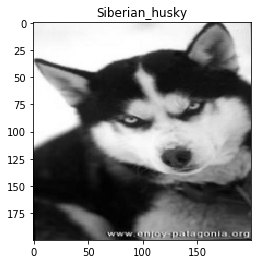

In [145]:
ex = dogs[0].reshape((200,200))
plt.imshow(ex, cmap='gray')
plt.title(labels[0])
plt.show()

In [146]:
# taken from Class Demo #4
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=1.5, top=.90, hspace=.35)
    
    # with slight modification
    sample = np.random.randint(low=0, high=images.shape[0], size=n_row*n_col)
    
    for i, idx in enumerate(sample):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[idx].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[idx], size=12)
        plt.xticks(())
        plt.yticks(())

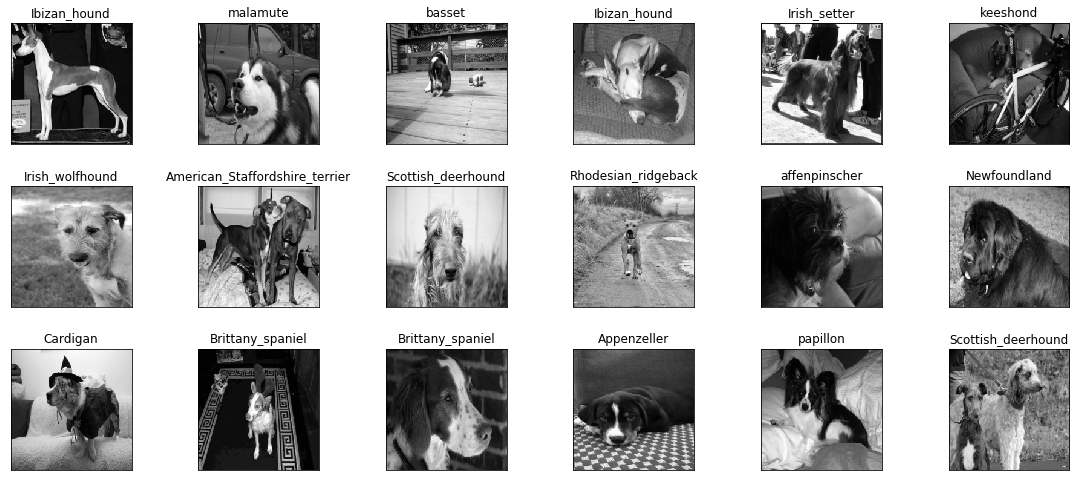

In [147]:
plot_gallery(dogs, labels, 200, 200) # defaults to showing a 3 by 6 subset of the faces

Aren't they cute?  The answer is yes. They are.

## Feature Extraction
### Gradient

Let's start by doing a simple edge detection using the gradient (a.k.a a sobel filter)

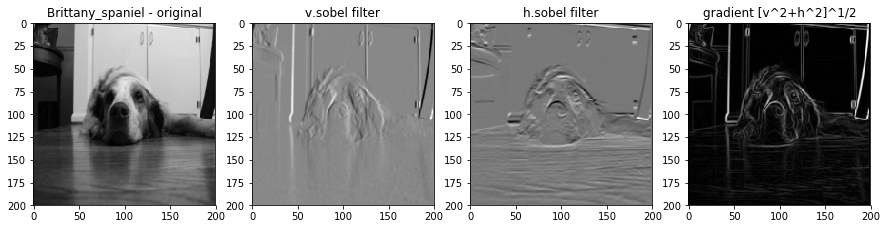

In [148]:
from skimage.filters import sobel_h, sobel_v

idx_to_reconstruct = int(np.random.rand(1)*len(dogs))
img  = dogs[idx_to_reconstruct].reshape((h,w))

plt.figure(figsize=(15,30))
plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title(labels[idx_to_reconstruct]+' - original')

plt.subplot(1,4,2)
plt.imshow(sobel_v(img,), cmap='gray')
plt.title('v.sobel filter')

plt.subplot(1,4,3)
plt.imshow(sobel_h(img), cmap='gray')
plt.title('h.sobel filter')

plt.subplot(1,4,4)
gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 ) 
plt.imshow(gradient_mag, cmap='gray')
plt.title('gradient [v^2+h^2]^1/2')
plt.show()

Let's take the gradient of each image in the dataset and see if we can use it to classify the breed.  Or at least get similar looking images...

In [149]:
def take_gradient(row, shape):
    img = row.reshape(shape)
    gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 ) 
    return gradient_mag.reshape(-1)
# case
%time take_gradient(dogs[0], ((h,w))).shape

CPU times: user 2.68 ms, sys: 1.32 ms, total: 4 ms
Wall time: 2.34 ms


(40000,)

In [150]:
%time grad_features = np.apply_along_axis(take_gradient, 1, dogs, (h,w))
print(grad_features.shape)

CPU times: user 4.13 s, sys: 1.14 s, total: 5.27 s
Wall time: 5.37 s
(3000, 40000)


Let's take a quick look at some of these

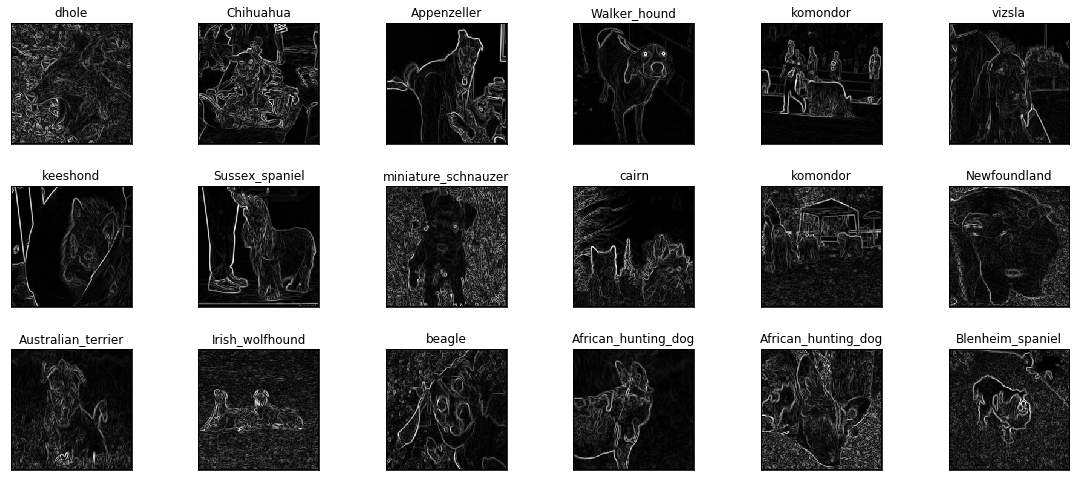

In [151]:
plot_gallery(grad_features, labels, h, w) 

This doesn't look too promising, but let's keep going.

In [152]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(grad_features)

CPU times: user 16.6 s, sys: 136 ms, total: 16.8 s
Wall time: 8.69 s


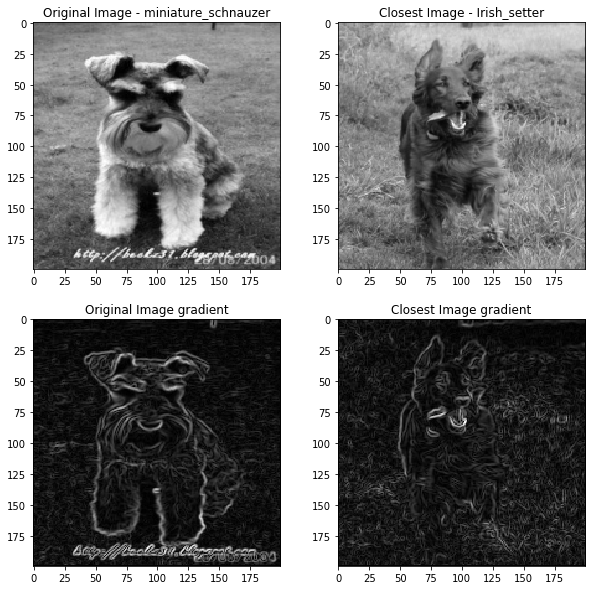

In [162]:
import copy
# find closest image to current image
idx1 = np.random.randint(0,len(dogs))
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(dogs[idx1].reshape((h,w)), cmap='gray')
plt.title("Original Image - " + labels[idx1])

plt.subplot(2,2,2)
plt.imshow(dogs[idx2].reshape((h,w)), cmap='gray')
plt.title("Closest Image - " + labels[idx2])

plt.subplot(2,2,3)
plt.imshow(grad_features[idx1].reshape((h,w)), cmap='gray')
plt.title("Original Image gradient")

plt.subplot(2,2,4)
plt.imshow(grad_features[idx2].reshape((h,w)), cmap='gray')
plt.title("Closest Image gradient")

plt.show()

This method doesn't work very well for this dataset since its extremely sensitive position of the object in the image.  If two images are very "close" to one another using this method it is more likely that subject of the image are in similar positions, rather than the subjects being similar to one another.  For example consider the match from one iteration below:

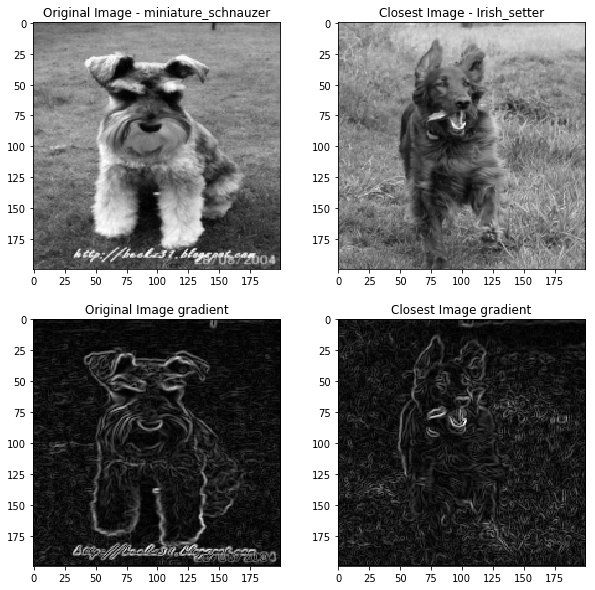

No one would ever mistake a miniature schnauzer for an Irish setter.  However, in these particular images the two dogs are both forward facing, approximately the same size relative to the size of the image, and pictured with a grassy background.  Thus, by their gradients, the images are similar.

We can illustrate this by looking at a heatmap of the pairwise distance of the gradients:

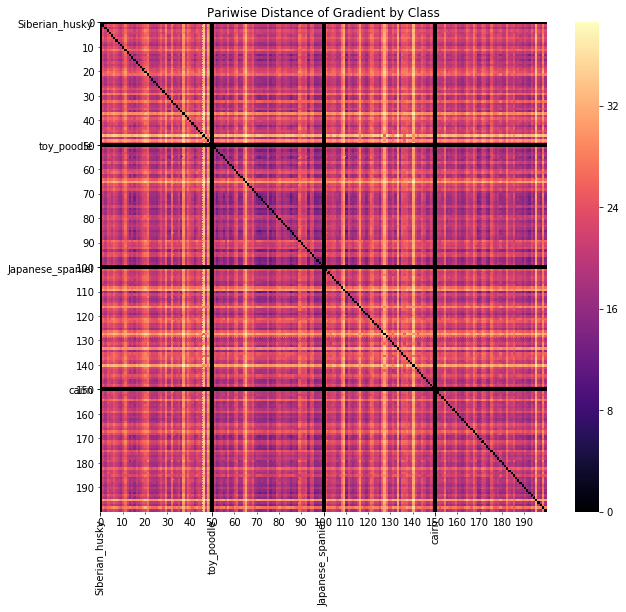

In [223]:
import seaborn as sns

plt.figure(figsize=(10,9))
ax = sns.heatmap(dist_matrix[:200,:200], cmap='magma')

ax.set_xticks(np.arange(0,200,50))
ax.set_xticks(np.arange(0,200,10), minor=True)
ax.set_yticks(np.arange(0,200,50))
ax.set_yticks(np.arange(0,200,10), minor=True)

ax.set_xticklabels([*labels[0:200:50]])
ax.set_xticklabels(np.arange(0,200,10), minor=True)
ax.set_yticklabels([*labels[0:200:50]])
ax.set_yticklabels(np.arange(0,200,10), minor=True)

ax.grid(markevery=5, lw=4,color='black')

ax.set_title('Pariwise Distance of Gradient by Class')

plt.show()


This heatmap shows the pairwise distance between the instances of the first four breeds in the dataset. If minimizing the distance in the gradient were any good as a classifier, one would expect there to be significantly darker colors within each major square along the diagnol vs. the rest of the grid.  Since each square in the 4x4 grid has roughly the same distribution of colors, we can conclude that this is not a good classifier.

### DAISY

Let's see if using the DAISY method is any more effective as a classifier.